In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import datetime as dt
import plotly.graph_objs as go
import plotly.offline as py
import seaborn as sb

from sklearn.linear_model import LinearRegression 
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

# Wine Quality Dataframe - Machine Learning Project
Progetto a cura di Andrea Chinetti, Gianluca Nogara.

Il Dataframe selezionato tratta la qualità del vino andando ad analizzare i vari componenti.

La prima parte del Dataframe è relativa agli ___acidi___, abbiamo infatti:
- __fixed acidity__: indica i cosiddetti "acidi fissi", diverse tipologie di acidi che variano tra 4,5 e 16 g/L
- __volatile acidity__: indica gli "acidi volatili", ovvero quelli che si disperdono durante la vita del vino (in particolare l'acido acetico), che variano tra 0.1 e 1.6g/L
- __citrix acid__: indica l'acido citrico, che seppur contenuto negli acidi fissi viene analizzato separatamente, con un valore compreso tra 0 e 1g/L

Gli acidi sono tra le sostanze più importanti presenti nel vino, secondi solo ad acqua e alcoli. La presenza di acidi nel vino gli conferisce la caratteristica freschezza al palato, tipica dei vini bianchi e degli spumanti in generale. Un’elevata acidità “alleggerisce” il vino, facendolo sembrare meno corposo, mentre una bassa acidità sottolinea la morbidezza e la struttura del vino.

Troviamo poi le altri elementi tra cui lo ___zucchero residuo___ (__residual sugar__), la quantità di zucchero influenzia la tipologia di vini che possiamo trovare. 
Un _vino secco_ ha un tasso di zuccheri che si attesta sotto ai 4g/L, fino ad arrivare fino a 250g/L per i _vini dolci_.

Abbiamo poi i ___cloruri___ (__chlorides__), espressi convenzionalmente come grammi di NaCl per litro, per la maggior parte dei vini da tavola il limite massimo è di 1,0 g/litro di NaCl.

Proseguendo con le componenti troviamo l'___anidride solforosa___, utilizzata in enologia per le sue contemporanee azioni antiossidanti e antisettiche, si presenta in due modi nel Dataframe:
- __free sulfur dioxide__: indica la quantità di anidride solforosa che non si combina con il vino e resta libera, che si attesta tra 1 e 72 mg/l di SO2
- __total sulfur dioxide__: indica la quantità totale di anidride solforosa, che si attesta tra 6 e 289 mg/l di SO2 

Possiamo trovare poi la __densità__ (__density__) che indica la densità relativa a 20° C e si esprime in un valore adimensionale che si attesta sull'1.

Il __pH__, che ovviamente è conosciuto come l'indice di acidità per eccellenza, indica appunto se un vino è acido (pH < 7) o basico (pH > 7), i cui valori vanno dallo 0 al 14.

Abbiamo i __solfiti__ (__sulphates__) che fanno riferimento allo zolfo che può essere introdotto con l'acqua potabile e con i prodotti ortofrutticoli. 

Al termine del nostro DataFrame troviamo la componente per eccellenza del vino: __l'alcol__ (__alcohol__), che rappresentato in % rispetto al volume, va in genere da 8 a 15.

Troviamo poi la valutazione del vino che ne rappresenta la __qualità__ (__quality__) che sta tra il 3 e l'8 ed è un valore adimensionale.

In [2]:
#https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009
df = pd.read_csv("winequality-red.csv")
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6  

[1599 rows x 12 columns]

## Informazioni generali

In questa sezione andremo ad approfondire le nostre conoscenze sul dataframe che stiamo analizzando.
In particolare si cercherà di estrarre informazioni generali tramite l'ausilio di diverse librerie (pandas, plotply, matplotplib, numpy) generando tabelle, istogrammi e boxplot per comprendere al meglio i dati.

Iniziamo quindi l'esplorazione!

1) Con questa tabella abbiamo voluto descrivere le statistiche relative al nostro DataFrame 

In [3]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

2) Con quest'altra serie di grafici andiamo a dare un occhio a quella che è la distribuzione dei valori delle colonne tramite degli istogrammi

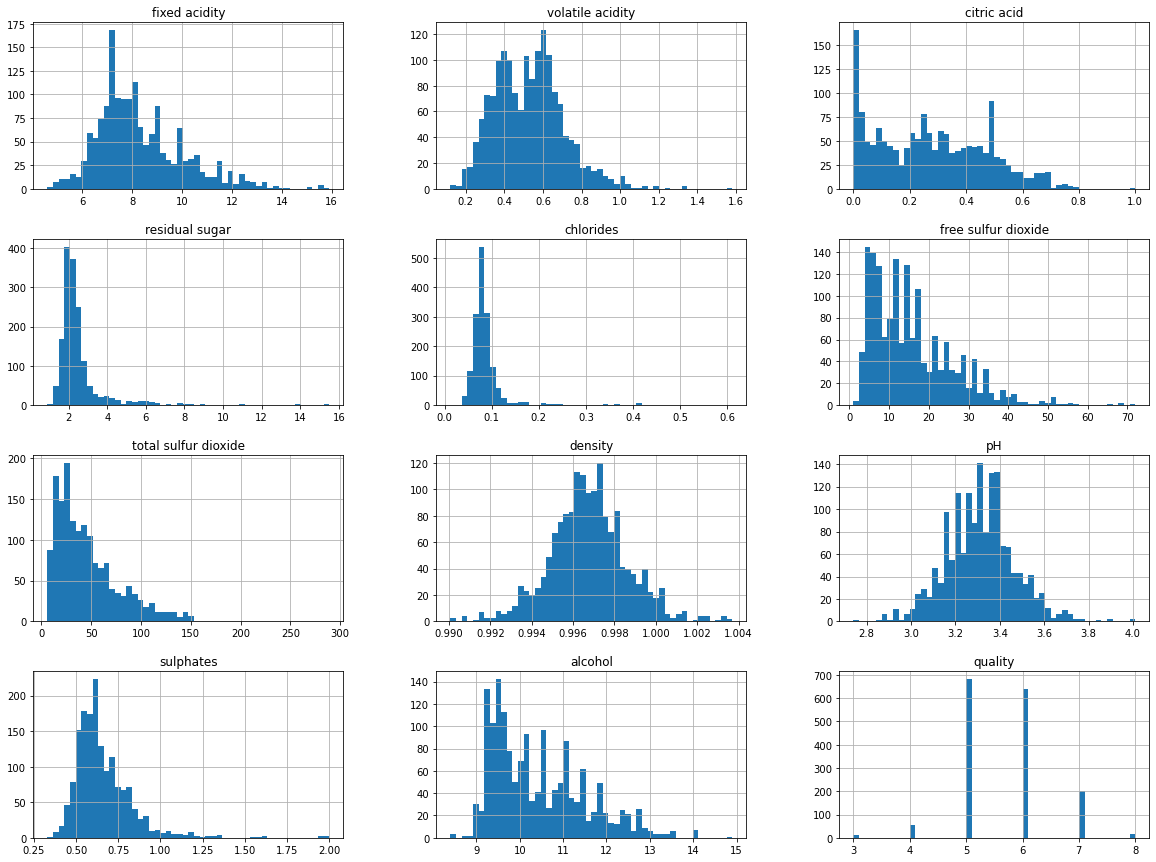

In [4]:
# Visualizzazione grafica della distribuzione dei valori delle features (istogrammi)
df.hist(bins=50, figsize=(20,15))
plt.show()

3) Possiamo dare uno sguardo alle informazioni della tabella, balza subito all'occhio che non ci sono campi null e la maggior parte dei dati è di tipo float64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


4) Qui siamo andati ad analizzare la qualità del vino 
- __Low__: valutazione pari a 3, 4 oppure 5
- __Mid__: valutazione uguale a 6
- __High__: valutazione pari a 7 
- __Excellent__: valutazione pari a 8

Come possiamo osservare abbiamo pochissimi vini di qualità eccellente e molti con una qualità media o bassa. 

In [6]:
sorted_quality = df.sort_values(by='quality')
sorted_quality["Quality"] = "Low"
sorted_quality.loc[(df["quality"] > 5) & (sorted_quality["quality"] < 7) , "Quality"] = "Mid" 
sorted_quality.loc[(df["quality"] >= 7) & (sorted_quality["quality"] < 8) , "Quality"] = "High" 
sorted_quality.loc[(df["quality"] >= 8) , "Quality"] = "Excellent" 

px.histogram(sorted_quality, title="Count of Quality Wine", x="Quality", labels={"quality": "Quality"})


5) Con questo istogramma abbiamo messo in relazione la __qualità del vino__ con il quantitativo di __alcol__ presente

In [7]:
new = sorted_quality.sort_values(by='quality') 
fig = px.histogram(new, orientation="v", x="alcohol", color="Quality", title="Quality and alcohol", barmode="group")
fig.update_layout(
    title="Quality and alcohol",
    xaxis_title="Alcohol %",
    yaxis_title="Count",
    legend_title="Quality",
)

fig.show()

6) Essendo l'acido un componente molto importante (seppur in piccole quantità) per il vino, si è deciso di analizzare la distribuzione degli acidi, che mostra come gli acidi volatili (volatile acidity), è presente in minor quantità rispetto agli acidi fissi (fixed acidity)

In [8]:
new = sorted_quality[['fixed acidity', 'volatile acidity']].copy()
for col in new:
    #fig.add_trace(go.Box(y=new[col].values, name=new[col].name))
    fig = px.box(pd.melt(new), y="variable", x="value", points="outliers")
    fig.update_layout(
    title="Acidity Distribution",
    yaxis_title="Acidity types",
    xaxis_title="Value")

fig.show()

7) Per poter darci un'idea migliore di come le varie componenti chimiche interagiscono tra di loro abbiamo scelto di mostrare la loro correlazione, si graficamente che analiticamente

In [9]:
corr_matrix = df.corr()
print(corr_matrix["residual sugar"].sort_values(ascending = False))

residual sugar          1.000000
density                 0.355283
total sulfur dioxide    0.203028
free sulfur dioxide     0.187049
citric acid             0.143577
fixed acidity           0.114777
chlorides               0.055610
alcohol                 0.042075
quality                 0.013732
sulphates               0.005527
volatile acidity        0.001918
pH                     -0.085652
Name: residual sugar, dtype: float64


<AxesSubplot:>

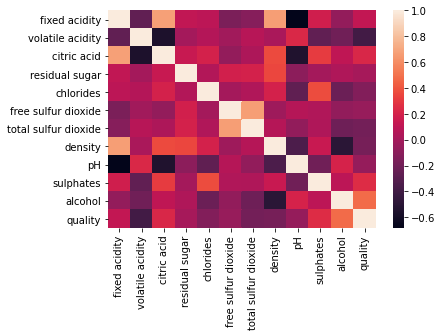

In [10]:
sb.heatmap(df.corr())

## Regressione lineare semplice
- Secondo la chimica un __pH basso indica una forte acidità__, questa legge viene confermata dalla regressione generata.

    Infatti un vino con un basso pH ha un alto livello di acidità fissa (fixed acidity)

In [11]:
x = df["pH"].values
y = df["fixed acidity"].values

w_hat = np.sum((x-np.mean(x))*(y-np.mean(y)))/np.sum((x-np.mean(x))**2)
b_hat = np.mean(y)-w_hat*np.mean(x)

x_line = np.array([np.min(x), np.max(x)])
y_line = b_hat + w_hat*x_line
data = [
    go.Scatter(x=x, y=y, mode="markers", name="data"),
    go.Scatter(x=x_line, y=y_line, mode="lines", name="regression line"),
]
layout = go.Layout(xaxis = dict(title="pH"), yaxis = dict(title="fixed acidity"))
py.iplot(go.Figure(data, layout))


print("coefficiente di correlazione " , np.corrcoef(x,y)[0, 1])

coefficiente di correlazione  -0.6829781945685316


- Una componente molto importante per la misurazione del vino è il residuo zuccherino, pertanto l'obiettivo è quello di vedere se abbiamo una possibile correlazione tra il __residuo zuccherino__ e __l'alcol__:

In [12]:
x = df["residual sugar"].values
y = df["alcohol"].values

w_hat = np.sum((x-np.mean(x))*(y-np.mean(y)))/np.sum((x-np.mean(x))**2)
b_hat = np.mean(y)-w_hat*np.mean(x)

x_line = np.array([np.min(x), np.max(x)])
y_line = b_hat + w_hat*x_line
data = [
    go.Scatter(x=x, y=y, mode="markers", name="data"),
    go.Scatter(x=x_line, y=y_line, mode="lines", name="regression line")
]
layout = go.Layout(xaxis = dict(title="residual sugar"), yaxis = dict(title="alcohol"))
py.iplot(go.Figure(data, layout))
print("coefficiente di correlazione " , np.corrcoef(x,y)[0, 1])

coefficiente di correlazione  0.04207543720973105


Il risultato dello scatter plot mostra come i valori del residuo zuccherino siano distribuiti in modo più o meno omogeneo, un'informazione che possiamo trarre dal grafico è che i vini più "forti" (con un tasso alcolico) non hanno residuo zuccherino alto.

Come possiamo vedere infatti abbiamo che nessun vino con tasso alcolico che si attesta attorno al 14% del volume ha più di 2,6 mg/l zuccheri. 

## Addestramento di un modello di Machine Learning

#### Preprocessing dei dati

In questa sezione andremo ad effettuare del training, per prima cosa ci occuperemo di __convertire i dati__ del DataFrame in valori numerici per memorizzarli __in ndarray__.

#### Split validation set

Una volta ottenuti i dati in data_x e data_y andiamo a splittare i due array ottenuti in __validation set__ e __training set__. Rispettivamente 30% e 70% dei dati.

Andiamo quindi ad effettuare uno __split casuale__: andiamo a selezionare casualmente i pattern da inserire nei due differenti set.

In [13]:
data_x = df.values[:,0:11]
data_y = df.values[:,11]
print(data_y)
valid_portion = 0.7
# Split random to train, test set
train_x, validation_x, train_y, validation_y = train_test_split(data_x, data_y, test_size=valid_portion, random_state=1)

[5. 5. 5. ... 6. 5. 6.]


Ora abbiamo quattro dataset: __train_x, train_y, validation_x, validation_y.__


#### Regressione
L'obiettivo è quello di predire la qualità del vino. __Per addestrare un'istanza__ di un regressore usiamo il metodo __.fit(...)__ mentre __per ottenere le predizioni__ usiamo il metodo __.predict(...)__. L'obiettivo è quello di minimizzare l'RMSE (Root Mean Square Error), ovvero lo scostamento tra il valore predetto e quello reale.

In [14]:
# Addestramento di un LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(train_x, train_y)

# Ottenimento delle predizioni
train_y_predicted = lin_reg.predict(train_x)

# Calcolo del RMSE
rmse = np.sqrt(mean_squared_error(train_y, train_y_predicted))
print('Train RMSE: ', rmse) 

# Ottenimento delle predizioni (validation) e calcolo RMSE
validation_y_predicted = lin_reg.predict(validation_x)
rmse = np.sqrt(mean_squared_error(validation_y, validation_y_predicted))
print('Validation RMSE: ', rmse)

Train RMSE:  0.6412401722905764
Validation RMSE:  0.6541384182983067


#### R2
Per valutare __l'accuratezza della predizione__ usiamo la funzione __.score(...)__, che restituisce il coefficiente 𝑅2, ovvero un valore compreso tra 0 e 1 tanto più alto quanto è migliore la predizione restituita.

In [15]:
print('R2 score:', lin_reg.score(validation_x, validation_y))

R2 score: 0.34424148225762985


#### Errori
Andando a visualizzare la distribuzione degli errori otteniamo:

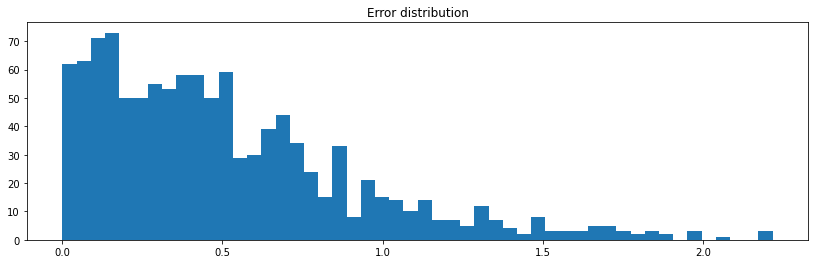

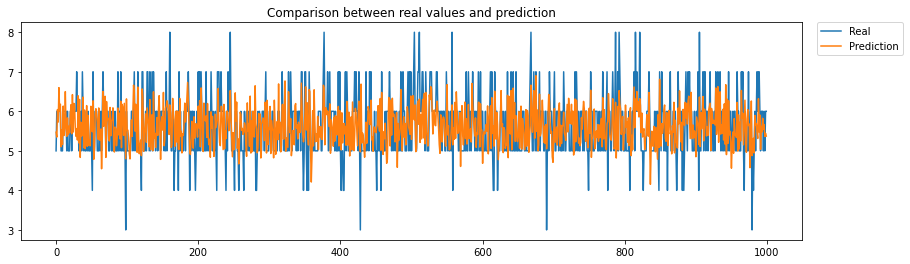

In [16]:
# Calcola l'errore come scostamento delle predizioni dal valore reale
errors = np.abs(validation_y - validation_y_predicted) 

plt.figure(figsize=(14, 4))
plt.title("Error distribution")
plt.hist(x = errors, bins=50)
plt.show()

# Visualizza l'andamento reale e quello predetto
plt.figure(figsize=(14, 4))
plt.title("Comparison between real values and prediction")
plt.plot(validation_y[0:1000], label='Real')
plt.plot(validation_y_predicted[0:1000], label='Prediction')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0.)
plt.show()

#### Conclusioni
Possiamo dunque concludere dicendo che questo è esattamente quello che ci aspettavamo. Infatti secondo la nostra idea non era possibile andare a definire la qualità di un vino solo con queste 10 colonne. Ci sono numerosi altri fattori che possono influenzare la qualità di un vino come per esempio la temperatura alla quale viene conservato, l'altitudine alla quale viene mantenuto, la stagionatura...

## Secondo Addestramento di un modello di Machine Learning

[3.51 3.2  3.26 ... 3.42 3.57 3.39]
Train RMSE:  0.08374315929259586
Validation RMSE:  0.0858913298154199
R2 score: 0.6818574198785224


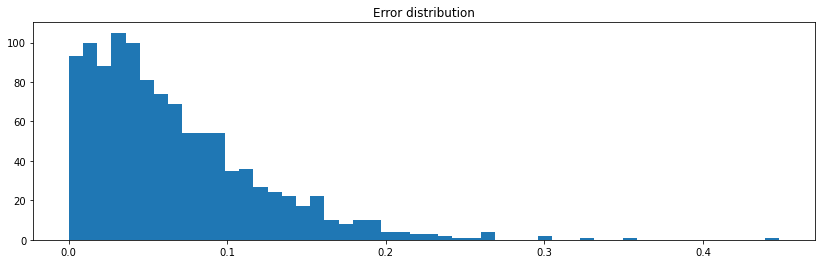

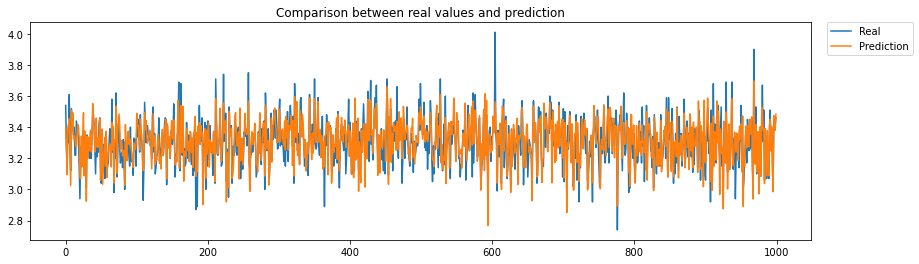

In [17]:
dfNew = df[['fixed acidity', 'volatile acidity', 'citric acid', 'sulphates' , 
            'density', 'total sulfur dioxide', 'residual sugar'
           ,'free sulfur dioxide', 'chlorides', 'quality',  'alcohol','pH']].copy()
data_x = dfNew.values[:,0:11]
data_y = dfNew.values[:,11]
print(data_y)
valid_portion = 0.7
# Split random to train, test set
train_x, validation_x, train_y, validation_y = train_test_split(data_x, data_y, test_size=valid_portion, random_state=1)

lin_reg = LinearRegression()
lin_reg.fit(train_x, train_y)

# Ottenimento delle predizioni
train_y_predicted = lin_reg.predict(train_x)

# Calcolo del RMSE
rmse = np.sqrt(mean_squared_error(train_y, train_y_predicted))
print('Train RMSE: ', rmse) 

# Ottenimento delle predizioni (validation) e calcolo RMSE
validation_y_predicted = lin_reg.predict(validation_x)
rmse = np.sqrt(mean_squared_error(validation_y, validation_y_predicted))
print('Validation RMSE: ', rmse)

print('R2 score:', lin_reg.score(validation_x, validation_y))

errors = np.abs(validation_y - validation_y_predicted) 

plt.figure(figsize=(14, 4))
plt.title("Error distribution")
plt.hist(x = errors, bins=50)
plt.show()

# Visualizza l'andamento reale e quello predetto
plt.figure(figsize=(14, 4))
plt.title("Comparison between real values and prediction")
plt.plot(validation_y[0:1000], label='Real')
plt.plot(validation_y_predicted[0:1000], label='Prediction')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0.)
plt.show()

#### Conclusioni
I risultati ottenuti sono piuttosto buoni, possiamo notare come l'R2 sia di 0,68, quindi la regressione è di buona qualità. Possiamo quindi trarre che il pH è abbastanza correlato alle componenti chimiche del vino. 

## Regolarizzazione

In questa sezione andremo ad effettuare della regolarizzazione sui nostri dati al fine di __ridurre l'overfitting__,  e di conseguenza migliorare la qualità del modello.

Andremo a togliere dal nostro DataFrame la __qualità__, parametro sui cui andremo a fare __predizione__.

Otterremo dei valori di MSE che andremo poi a confrontare per capire quale regolarizzazione ha funzionato meglio sul nostro modello.

In [18]:
from sklearn.model_selection import cross_val_score #funzione per fare cross validation
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
df_data = pd.DataFrame({'Reg':['Least squares fittig','Ridge','Lasso'],
                   'MSE':['0','0','0']})

### Least squares fitting

In [19]:
Xs = df.drop(['quality'], axis=1) #togliamo la colonna della quality (è quello su cui facciamo predizione)
y = df['quality'].values.reshape(-1,1)
lin_reg = LinearRegression()
MSEs = cross_val_score(lin_reg, Xs, y, scoring='neg_mean_squared_error', cv=5)
mean_MSE = np.mean(MSEs)
df_data['MSE'].iloc[0]= abs(mean_MSE)
print(mean_MSE)

-0.43662938803209783


### Ridge

In [20]:
#la regressione si basa su lambda alpha che mettiamo da pochissimo a 20
alpha = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]

ridge = Ridge()
parameters = {'alpha': alpha}
ridge_regressor = GridSearchCV(ridge, parameters,scoring='neg_mean_squared_error', cv=5)

ridge_regressor.fit(Xs, y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20]},
             scoring='neg_mean_squared_error')

In [21]:
ridge_regressor.best_params_

{'alpha': 0.01}

In [22]:
mean_MSE = ridge_regressor.best_score_
df_data['MSE'].iloc[1]= abs(mean_MSE)
print(mean_MSE)

-0.4358745778540949


### Lasso

In [23]:
lasso = Lasso()

parameters = {'alpha': alpha}

lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv = 5)

lasso_regressor.fit(Xs, y)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20]},
             scoring='neg_mean_squared_error')

In [24]:
lasso_regressor.best_params_

{'alpha': 0.0001}

In [25]:
mean_MSE = lasso_regressor.best_score_
df_data['MSE'].iloc[2]= abs(mean_MSE)
print(mean_MSE)

-0.435868269191538


#### Conclusioni

Dopo aver effettuato le tre regressioni possiamo trarre una serie di conclusioni:

- Un ovvio vantaggio della regressione lasso rispetto alla regressione ridge è che produce modelli più semplici e più interpretabili che incorporano solo un insieme ridotto di predittori
- In generale, il lasso potrebbe funzionare meglio in una situazione in cui alcuni predittori hanno coefficienti elevati e i restanti predittori hanno coefficienti molto piccoli
- La regressione ridge funzionerà meglio quando il risultato è una funzione di molti predittori, tutti con coefficienti di dimensioni approssimativamente uguali

Nel nostro caso, analizzando l'MSE (Mean Square Error) possiamo notare come le 3 regressioni ottengano dati molto molto simili tra di loro, avendo la __Lasso__ e la __Ridge__ con valori di MSE pari a ___-0.43586___ e ___-0.43587___, mentre la __Least squares fitting__ a ___-0.436629___

Possiamo allora constatare che, seppur di pochissimo, la regolarizzazione migliore sul DataFrame è la __Lasso__

In [26]:
fig = px.bar(x=df_data['Reg'], y=df_data['MSE'], labels={'x':'Regression type', 'y':'MSE'}, range_y=[0.435, 0.437])
fig.show()

## Regressione Logistica

In [27]:
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [28]:
df["strong"]  = 0
df.loc[(df["alcohol"] >= 10), "strong"] = 1 
fig = px.histogram(df, x="strong", color="strong", barmode="group")
fig.show()

In [29]:
X2 = df.iloc[:,0:12].values
y2 = df.iloc[:,12].values

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = .3, random_state=25)

LogReg = LogisticRegression()
LogReg.fit(X_train2, y_train2)

y_pred2 = LogReg.predict(X_test2)

C:\Users\Gianluca\anaconda3\envs\DataScience\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [30]:
confusion_matrix = confusion_matrix(y_test2, y_pred2)
confusion_matrix

array([[183,   9],
       [ 18, 270]], dtype=int64)

In [31]:
print(classification_report(y_test2, y_pred2))
#matrice di confusione

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       192
           1       0.97      0.94      0.95       288

    accuracy                           0.94       480
   macro avg       0.94      0.95      0.94       480
weighted avg       0.94      0.94      0.94       480



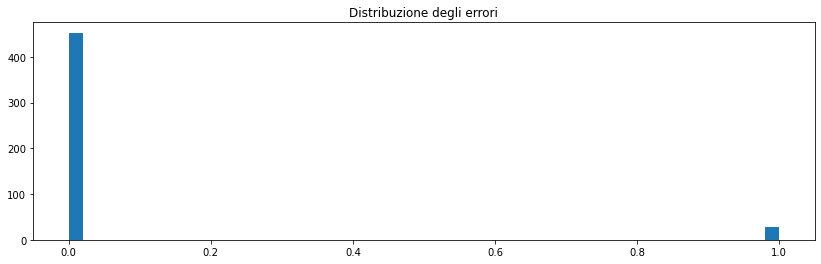

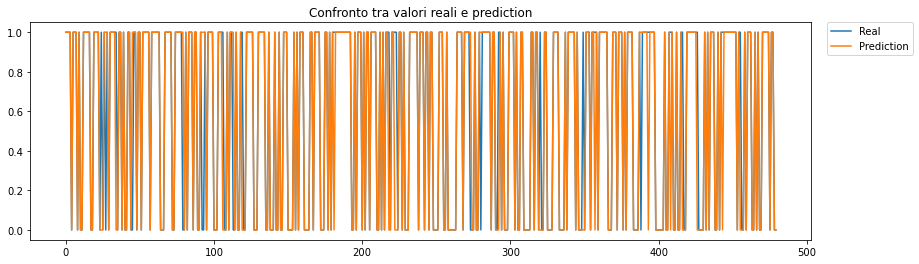

R2 score: 0.94375


In [32]:
errors = np.abs(y_test2 - y_pred2) 

plt.figure(figsize=(14, 4))
plt.title("Distribuzione degli errori")
plt.hist(x = errors, bins=50)
plt.show()

# Visualizza l'andamento reale e quello predetto
plt.figure(figsize=(14, 4))
plt.title("Confronto tra valori reali e prediction")
plt.plot(y_test2[0:1000], label='Real')
plt.plot(y_pred2[0:1000], label='Prediction')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0.)
plt.show()


print('R2 score:', LogReg.score(X_test2, y_test2))

#### Conclusioni
Come possiamo vedere dai risultati abbiamo un'ottima regressione logistica.

Con un R2 di 0,94 e un'accuracy del 94% non possiamo che ritenerci soddisfatti.

## K - Nearest Neighbor (classificazione sulla dolcezza)
Andiamo a creare tre classi per quanto riguarda il grado di dolcezza del vino che va in base al residuo zuccherino, abbiamo:

- "vino-secco" (fino a 4g/l)
- "vino-abboccato" (tra 4g/l e i 12 g/l)
- "vino-dolce"  (dopo 12 g/l)
 

In [33]:
# lista = list(set(df["residual sugar"]))
df["WineType"] = "extra-sweet"
df.loc[(df["residual sugar"] < 4) , "WineType"] = "dry" 
df.loc[(df["residual sugar"] > 5) & (sorted_quality["residual sugar"] < 12) , "WineType"] = "semi-sweet" 
df.loc[(df["residual sugar"] > 12) , "WineType"] = "extra-sweet" 

px.histogram(df, title="Count of types of Wine", x="WineType", labels={"WineType": "Sweetness"})

In [34]:
X = df.iloc[:, :-1].values
y = df.iloc[:, 13].values
# print(X)
# print(list(set(y)))


In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [37]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [38]:
y_pred = classifier.predict(X_test)

In [39]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[293   1   0]
 [  8   2   1]
 [  1   1  13]]
              precision    recall  f1-score   support

         dry       0.97      1.00      0.98       294
 extra-sweet       0.50      0.18      0.27        11
  semi-sweet       0.93      0.87      0.90        15

    accuracy                           0.96       320
   macro avg       0.80      0.68      0.72       320
weighted avg       0.95      0.96      0.95       320



In [40]:
error = []

# Calculating error for K values between 1 and 40 -> come cambiano le performance cambiando k
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

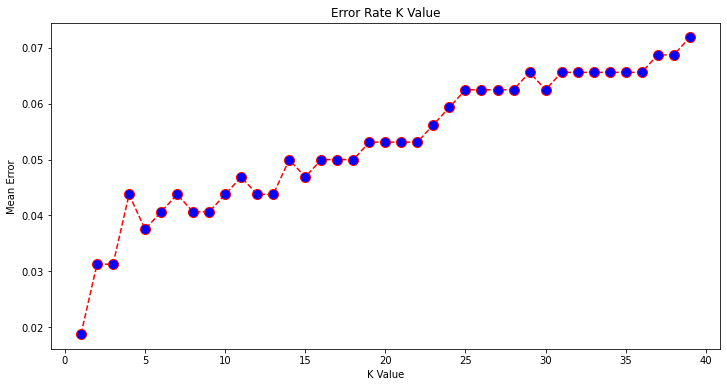

In [41]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

#### Conclusione
Purtroppo la distribuzione dei dati non è molto bilanciata, quindi potremmo avere dei problemi nella classificazione.

Così accade per i vini extra-sweet, dal momento che il regressore ne stima corretti solo la metà.

Niente da aggiungere per quanto riguarda la precisione dei vini secchi (dry) e semi dolci (semi-sweet)

## K - Nearest Neighbor (classificazione sulla qualità)
Andando a riprendere la qualità dei vini cerchiamo di effettuare classificazione.

La variabile target è composta così:

- Low: valutazione pari a 3, 4 oppure 5
- Mid: valutazione uguale a 6
- High: valutazione da 7

Dal momento che i dati sui vini eccellenti sono pochi abbiamo deciso di accorparli all'interno dei vini di alto livello (high)

In [53]:
sorted_quality.loc[(df["quality"] >= 8) , "Quality"] = "High" 

X = sorted_quality.iloc[:, :-1].values
y = sorted_quality.iloc[:, 12].values
# print(X)
# print(list(set(y)))


In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [55]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [56]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [57]:
y_pred = classifier.predict(X_test)

In [58]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 44   0   6]
 [  0 134  10]
 [  3   3 120]]
              precision    recall  f1-score   support

        High       0.94      0.88      0.91        50
         Low       0.98      0.93      0.95       144
         Mid       0.88      0.95      0.92       126

    accuracy                           0.93       320
   macro avg       0.93      0.92      0.93       320
weighted avg       0.93      0.93      0.93       320



In [59]:
error = []

# Calculating error for K values between 1 and 40 -> come cambiano le performance cambiando k
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

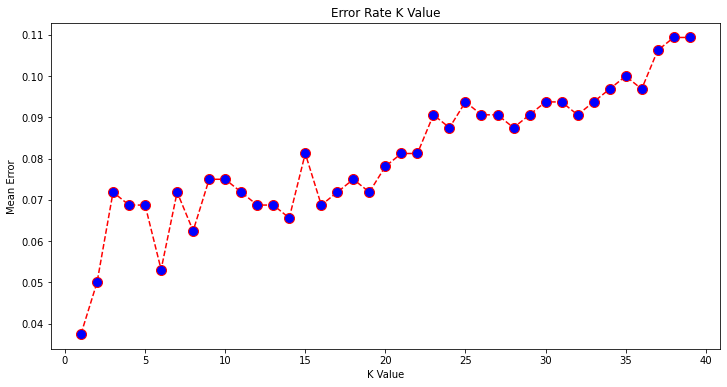

In [60]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

#### Conclusioni
La classificazione ha dato ottimi risultati, possiamo notare come l'accuracy è del 93%.

Una scelta che riteniamo essere stata importante riguarda la rimozione del